In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score, train_test_split

In [3]:
data = pd.read_csv("data/telescope.csv")
X = data.drop(columns="class")
y = LabelEncoder().fit_transform(data["class"])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [4]:
ss=StandardScaler().set_output(transform="pandas").fit(X_train)

In [17]:
(pd.concat(
    (ss.transform(X_train), pd.Series(y_train)), axis=1
).corr()[0]).round(3)

fLength     0.008
fWidth      0.014
fSize       0.005
fConc      -0.002
fConc1     -0.005
fAsym       0.008
fM3Long    -0.007
fM3Trans    0.011
fAlpha      0.014
fDist       0.004
0           1.000
Name: 0, dtype: float64

In [11]:
cols = ["fLength", "fWidth", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha"]

In [14]:
(ss.transform(X_train).corr() > 0.5).sum().loc[cols]

fLength     3
fWidth      3
fConc1      2
fAsym       1
fM3Long     1
fM3Trans    1
fAlpha      1
dtype: int64

In [16]:
(ss.transform(X_train).corr() > 0.5).loc[cols, cols]

,fLength,fWidth,fConc1,fAsym,fM3Long,fM3Trans,fAlpha
fLength,True,True,False,False,False,False,False
fWidth,True,True,False,False,False,False,False
fConc1,False,False,True,False,False,False,False
fAsym,False,False,False,True,False,False,False
fM3Long,False,False,False,False,True,False,False
fM3Trans,False,False,False,False,False,True,False
fAlpha,False,False,False,False,False,False,True


In [18]:
cols = ["fWidth", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha"]

In [19]:
scaler = StandardScaler().fit(X_train[cols])
svm = SVC().fit(scaler.transform(X_train[cols]), y_train)

In [21]:
svm.score(scaler.transform(X_train[cols]), y_train)

0.8179547844374343

In [22]:
from sklearn.metrics import matthews_corrcoef, ConfusionMatrixDisplay, confusion_matrix

In [24]:
matthews_corrcoef(
    svm.predict(
        scaler.transform(X_train[cols])
    ), y_train
)

0.5889343068925987

In [26]:
preds = svm.predict(
    scaler.transform(X_test[cols])
)

In [27]:
svm.score(scaler.transform(X_test[cols]), y_test)

0.8065194532071503

In [28]:
matthews_corrcoef(preds, y_test)

0.5693132475796726

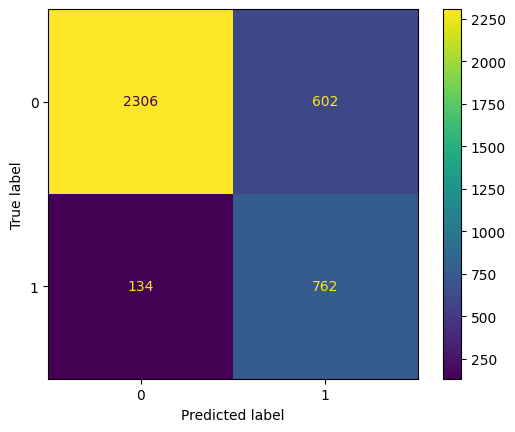

In [29]:
ConfusionMatrixDisplay(
    confusion_matrix(preds, y_test)
).plot()